In [1]:
from sklearn.decomposition import NMF

# load the fruits dataset
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

df

# Use nmf to find 2 latent features


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [2]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


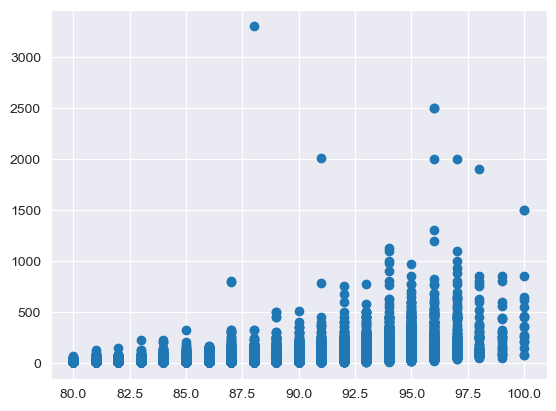

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['points'], df['price'])


In [4]:
#Remove lines with Nan
df = df.dropna()

In [5]:
#Isolate outliers with LOF
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(df[['points', 'price']])
outliers

array([-1,  1,  1, ...,  1,  1,  1])

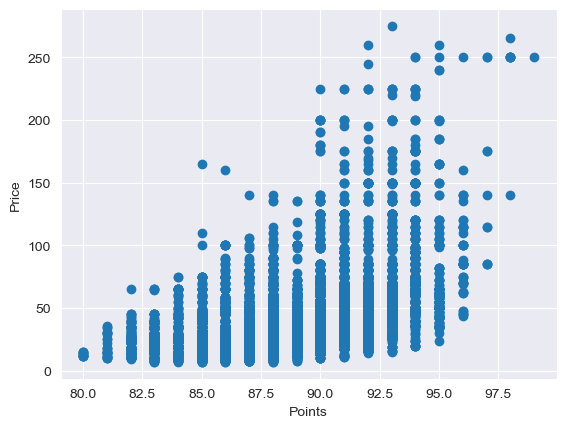

In [6]:
# Remove outliers from df
df = df.loc[outliers == 1]
plt.scatter(df['points'], df['price'])

#Write axis labels
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

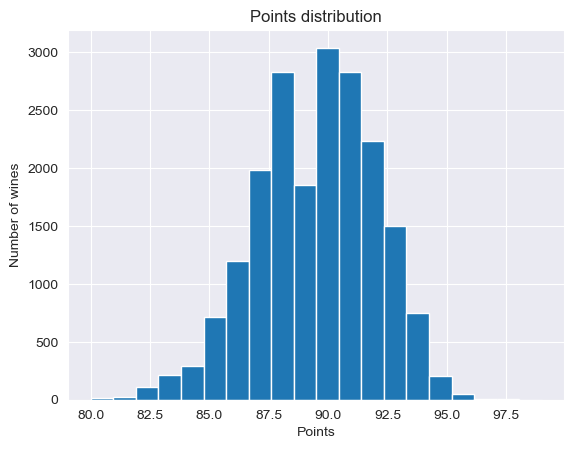

In [7]:
#Represent with histogram


plt.hist(df['points'], bins=20)
plt.title('Points distribution')
plt.xlabel('Points')
plt.ylabel('Number of wines')
plt.show()

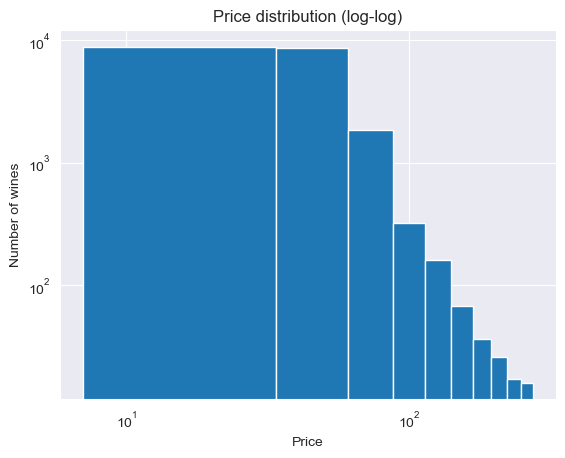

In [8]:
plt.hist(df['price'], bins=10)

#afficher une loglog pour comparer (essayer de trouver une power law)
plt.title('Price distribution (log-log)')
plt.xlabel('Price')
plt.ylabel('Number of wines')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [9]:
#(Bubble plot)
# Visualize Tasters, Varieties, Country

# Tasters
tasters = df['taster_name'].value_counts()

# Visualize tasters (Their number of reviews + grades), using bubble plot
# plt.scatter(tasters.index, tasters, s=tasters*10)
tasters




taster_name
Virginie Boone       5498
Paul Gregutt         5360
Matt Kettmann        3981
Sean P. Sullivan     3122
Jim Gordon           1720
Susan Kostrzewa        78
Joe Czerwinski         57
Michael Schachner      38
Lauren Buzzeo          11
Roger Voss              1
Christina Pickard       1
Name: count, dtype: int64

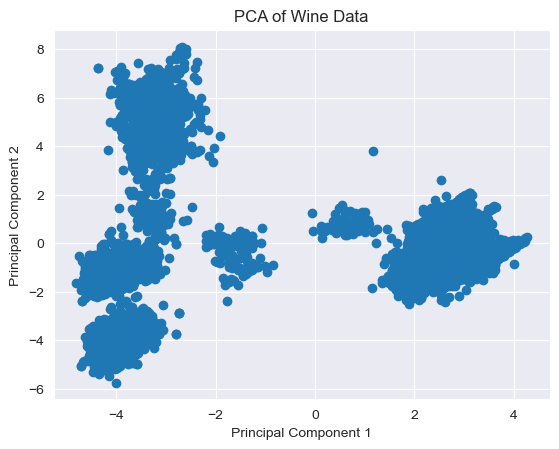

In [10]:
#PCA :

from sklearn.decomposition import PCA

#Prepare df for PCA (make one hot encoding)
dfPCAReady = pd.get_dummies(df)

#Scaler normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfPCAReady_np = scaler.fit_transform(dfPCAReady)



pca = PCA(n_components=2)
pca.fit(dfPCAReady_np)
df_pca = pca.transform(dfPCAReady_np)

plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Data')
plt.show()



Fitting model with 2 clusters
Fitting model with 3 clusters
Fitting model with 4 clusters
Fitting model with 5 clusters
Fitting model with 6 clusters
Fitting model with 7 clusters


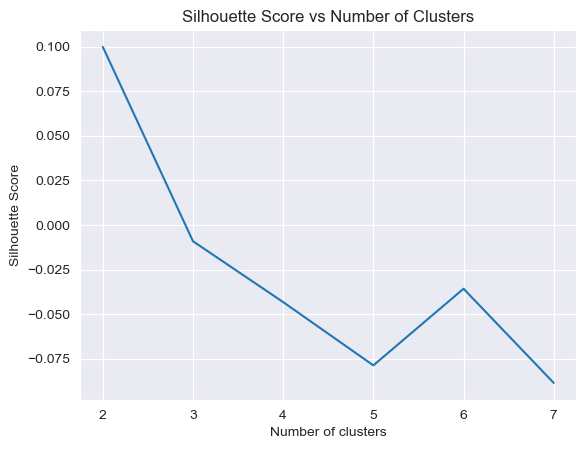

In [12]:
#Use silhouette score to find the best number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for n_clusters in range(2, 8):
    print(f'Fitting model with {n_clusters} clusters')
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(dfPCAReady_np)
    silhouette_scores.append(silhouette_score(dfPCAReady_np, cluster_labels))

plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [ ]:
# Create a DBSCAN model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(dfPCAReady_np)

# Plot the PCA with the cluster labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

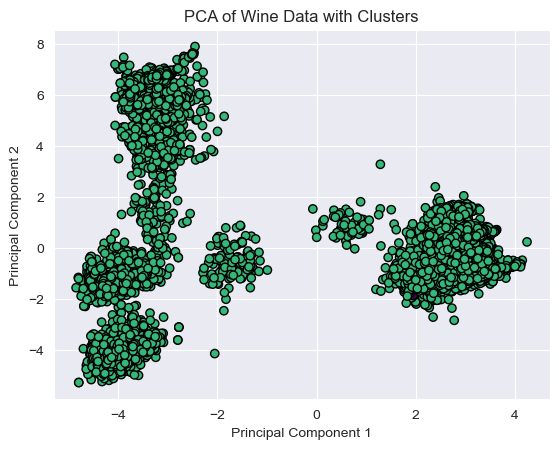

In [17]:
# Create a kmeans with 2 clusters
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(dfPCAReady_np)

# Plot the PCA with the cluster labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Data with Clusters')
plt.show()

In [52]:
# Interpretation of the PCA, and what constitutes the two axes
# Get the loadings
loadings = pca.components_.T
# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=dfPCAReady.columns)

# Group the loadings by their original categorical variables
grouped_loadings = loadings_df.groupby(loadings_df.index.str.extract(r'(^[^_]+)', expand=False)).sum()

# Sort the grouped loadings for each principal component by absolute value
grouped_loadings_sorted_pc1 = grouped_loadings['PC1'].abs().sort_values(ascending=False)
grouped_loadings_sorted_pc2 = grouped_loadings['PC2'].abs().sort_values(ascending=False)

# Display the sorted grouped loadings for PC1
print(grouped_loadings.loc[grouped_loadings_sorted_pc1.index]['PC1'])

# Display the sorted grouped loadings for PC2
print(grouped_loadings.loc[grouped_loadings_sorted_pc2.index]['PC2'])

winery         1.701
designation    1.000
region         0.669
title         -0.183
description   -0.159
province      -0.071
price          0.056
variety       -0.052
points         0.041
taster        -0.037
country        0.000
Name: PC1, dtype: float64
designation   -0.559
variety       -0.282
region         0.180
title          0.143
description    0.136
province       0.053
points         0.031
taster        -0.029
price          0.028
winery         0.016
country        0.000
Name: PC2, dtype: float64


<Axes: >

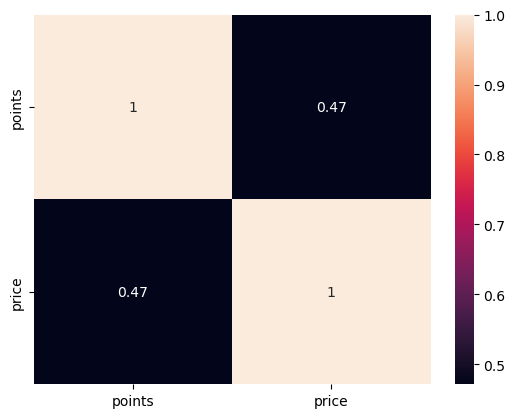

In [49]:
#Remove non-numerical columns
import numpy as np
df_num = df.select_dtypes(include=np.number)

corr_data = df_num.corr()
import seaborn as sns

sns.heatmap(corr_data, annot=True)

In [16]:
# corr_encoded = dfPCAReady.corr()

# sns.heatmap(corr_encoded, annot=True)
#TODO : Pick best parameters for correlation matrix, encode them and correlate


In [20]:
#Interpretation of the PCA, and what constitutes the two axes
# Fit the PCA model
# pca = PCA(n_components=2)
# pca.fit(dfPCAReady_np)

# Get the loadings
loadings = pca.components_.T

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=dfPCAReady.columns)

# Display the loadings
print(loadings_df)

                                                             PC1           PC2
points                                              4.007965e-02  3.559570e-02
price                                               5.547538e-02  4.326790e-02
country_US                                          5.330747e-16 -1.311551e-15
description_. A delightfully intriguing “White ...  1.733686e-03  1.639032e-04
description_100% Cabernet Sauvignon from Wallul... -2.436721e-03 -3.851918e-03
...                                                          ...           ...
winery_un4seen                                      1.658064e-03 -2.832411e-04
winery_Écluse                                       6.025806e-03 -1.354402e-03
winery_Élevée Winegrowers                          -3.892436e-03  9.061229e-03
winery_Órale                                        1.640349e-03 -5.736247e-04
winery_àMaurice                                    -1.205478e-02 -1.376381e-02

[48030 rows x 2 columns]


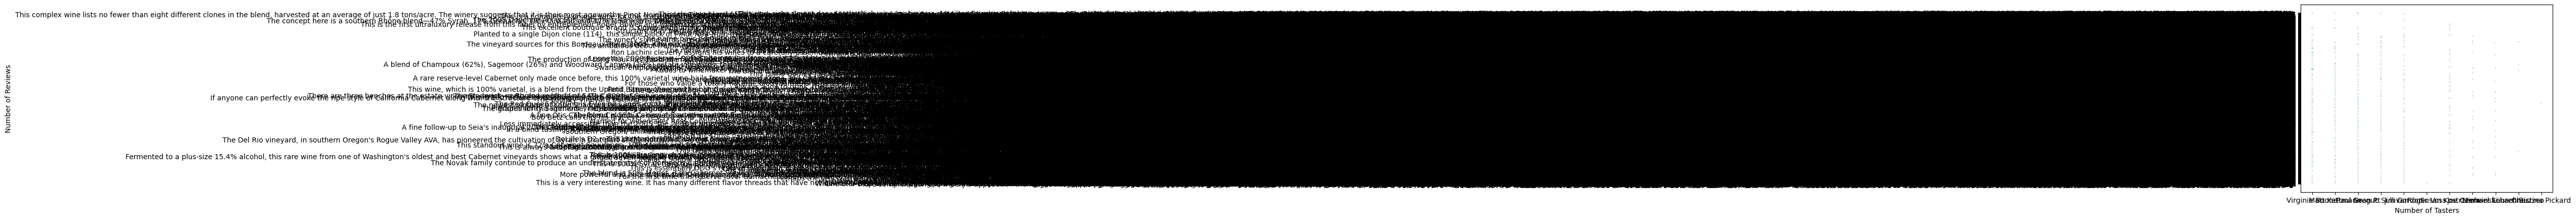

In [18]:
from pylab import *
import pandas as pd

data = df 

# Extracting relevant columns
tasters = data['taster_name'].reset_index(drop=True)
reviews = data['description'].reset_index(drop=True)  # Replace with the actual column name for reviews
grades = data['points'].reset_index(drop=True)  # Replace with the actual column name for grades
population = data['price'].reset_index(drop=True)  # Replace with the actual column name for population

x = []
y = []
color = []
area = []

for i in range(len(data)):
    x.append(tasters[i])
    y.append(reviews[i])
    color.append(grades[i])
    area.append(sqrt(population[i]))

# making the scatter plot
sct = scatter(x, y, c=color, s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

xlabel('Number of Tasters')
ylabel('Number of Reviews')
show(